# Assignment 3.2

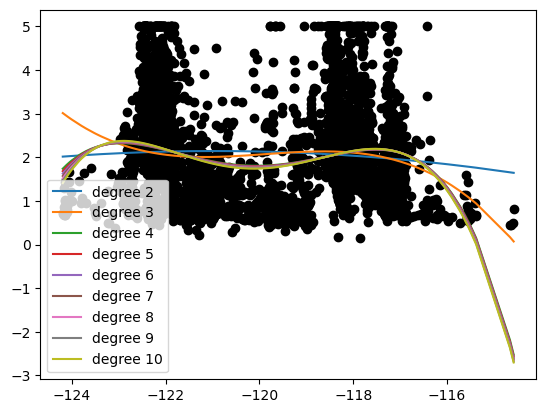

The MSE for all the degrees are: 

MSE for degree 2 is 1.3079454099754855.
MSE for degree 3 is 1.2820612523796975.
MSE for degree 4 is 1.2375127449140102.
MSE for degree 5 is 1.2351021484121958.
MSE for degree 6 is 1.2326371637781803.
MSE for degree 7 is 1.230124315394341.
MSE for degree 8 is 1.2275705817209854.
MSE for degree 9 is 1.2249831636760717.
MSE for degree 10 is 1.222369339722741.


In [27]:
# imports
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# fetch the datasets
housing_data = fetch_california_housing()

# Split the data into training and test set
X = housing_data.data[:, np.newaxis, 7]
y = housing_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the degrees from 2 to 11
degrees = np.arange(2, 11)

# Dictionary to store MSE for each degree
mse_dict = {}


# Plot the graph
plt.scatter(X_test, y_test, color="black")

for degree in degrees:
    # Create the model
    polynomial_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    polynomial_model.fit(X_train, y_train)
    
    # Predicting on the testing set
    y_pred = polynomial_model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    # Save the Mean Squared Error
    mse_dict[degree] = mse
    
    # Sort the test data and predictions by the test data
    sorted_indices = np.argsort(X_test.flatten())    
    X_test_sorted = X_test[sorted_indices]
    y_pred_sorted = y_pred[sorted_indices]
    
    plt.plot(X_test_sorted, y_pred_sorted, label="degree {}".format(degree))
    

# Show the plot
plt.legend()
plt.show()


# Printing the MSE for each model
print("The MSE for all the degrees are: \n")

for degree, mse in mse_dict.items():
    print("MSE for degree {} is {}.".format(degree, mse))

